# 固有値と共分散

主成分分析ではデータの分散を情報の量として扱い、固有値を用いて分散が最大化される軸を選ぶ

また、因子分析ではいくつの因子を使うかの判断基準のひとつにガットマン基準（固有値が1以上の因子を使う）というものがある。

固有値と共分散や相関の関係を調べてみる

相関係数の異なるデータをいくつか生成して固有値と固有ベクトル（PC1, PC2）を出してみる。

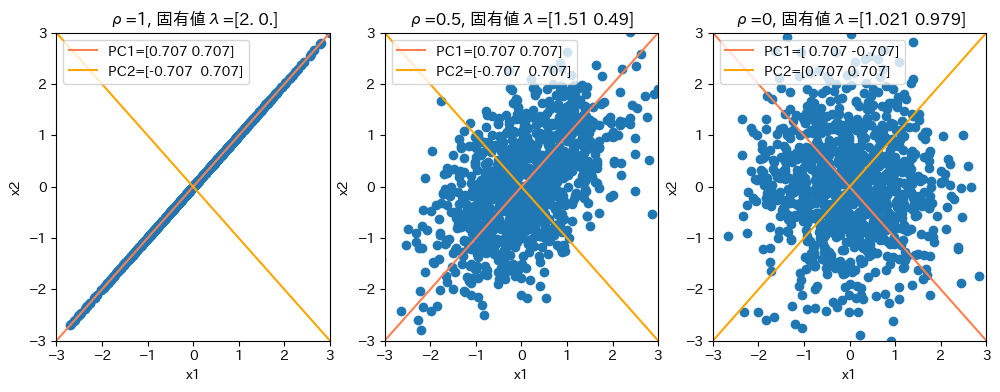

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

n = 1000
np.random.seed(0)

# いくつかの相関係数で試す
rhoset = [1, 0.5, 0]
fig, axes = plt.subplots(figsize=[12, 4], ncols=len(rhoset))

for i, rho in enumerate(rhoset):
    true_cov = np.array([[1, rho],
                         [rho, 1]])
    X = np.random.multivariate_normal(mean=[0,0], cov=true_cov, size=n)
    # Cov = np.cov(X, rowvar=False)
    Corr = np.corrcoef(X, rowvar=False)
    # 固有値分解で主成分を取得（共分散を最大化する軸が固有ベクトルになるという定理のため）
    # 共分散より相関係数を使うほうが対角成分が1になって安定するので、相関を使うことにする
    lambdas, vectors = np.linalg.eig(Corr)

    axes[i].scatter(X[:, 0], X[:, 1])
    axes[i].axline(xy1=(0, 0), xy2=(vectors[:, 0]), color="coral", label=f"PC1={vectors[:, 0].round(3)}")
    axes[i].axline(xy1=(0, 0), xy2=(vectors[:, 1]), color="orange", label=f"PC2={vectors[:, 1].round(3)}")
    axes[i].set(xlabel="x1", ylabel="x2", xlim=(-3, 3), ylim=(-3, 3), title=f"ρ={rho}, 固有値λ={lambdas.round(3)}")
    axes[i].legend()
fig.show()


$\rho=1$のとき、固有値$\lambda=(2, 0)$となり、第2主成分は全然情報量（=分散=固有値）を持たないことがわかる。

$\rho=0.5$のとき、第2主成分の固有値は大きくなったものの、まだ固有値は小さい。実際、PC2の持っている情報量（分散）は小さい。十分な情報量があるかどうかの判定に「固有値が1以上かどうか」を使う基準はここからきているのだと思われる。

$\rho=0$のとき、2つの主成分の固有値は1に近づいている。